<a href="https://colab.research.google.com/github/andrewwhite5/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/SprintChallenge/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the data
df = pd.read_csv('haberman.data')
print(df.shape)  # Should have 306 rows -- There are 305 rows with the first row (the 306th) where the attributes should be
df.head(10)

(305, 4)


,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [3]:
df.isna().sum()  # Check for missing values

30     0
64     0
1      0
1.1    0
dtype: int64

In [4]:
# Rename columns
col_headers = ['Age', 'Year of Operation', 'Positive Axillary Nodes', 'Survival Status']

df = pd.read_csv('haberman.data', header=None, names=col_headers)
df.head()

,Age,Year of Operation,Positive Axillary Nodes,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
#  In Survival Status: encode 1's as 0's and 2's as 1's
df['Survival Status'] = pd.get_dummies(df['Survival Status'], prefix_sep='_', drop_first=True)
df.head(20)

,Age,Year of Operation,Positive Axillary Nodes,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
7,34,59,0,1
8,34,66,9,1
9,34,58,30,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

### Crosstab 1 -- Survival Status by Age

In [6]:
age_bins = pd.cut(df['Age'], 5)  # 5 bins of age to compare with survival status
pd.crosstab(age_bins, df['Survival Status'], normalize='columns')

Survival Status,0,1
Age,,
"(29.947, 40.6]",0.173333,0.049383
"(40.6, 51.2]",0.302222,0.382716
"(51.2, 61.8]",0.306667,0.333333
"(61.8, 72.4]",0.191111,0.197531
"(72.4, 83.0]",0.026667,0.037037


###Crosstab 2 -- Survival Status by Positive Axillary Nodes

In [7]:
axillary_bins = pd.cut(df['Positive Axillary Nodes'], 10)  # 10 bins of positive axillary nodes to compare with survival status
pd.crosstab(axillary_bins, df['Survival Status'], normalize='columns')

Survival Status,0,1
Positive Axillary Nodes,,
"(-0.052, 5.2]",0.844444,0.567901
"(5.2, 10.4]",0.080000,0.148148
"(10.4, 15.6]",0.031111,0.135802
"(15.6, 20.8]",0.017778,0.049383
"(20.8, 26.0]",0.013333,0.074074
"(26.0, 31.2]",0.008889,0.000000
"(31.2, 36.4]",0.000000,0.012346
"(41.6, 46.8]",0.004444,0.000000
"(46.8, 52.0]",0.000000,0.012346


###Crosstab 3 -- Survival Status by Year of Operation

In [8]:
pd.crosstab(df['Year of Operation'], df['Survival Status'], normalize='columns')

Survival Status,0,1
Year of Operation,,
58,0.106667,0.148148
59,0.080000,0.111111
60,0.106667,0.049383
61,0.102222,0.037037
62,0.071111,0.086420
63,0.097778,0.098765
64,0.102222,0.098765
65,0.066667,0.160494
66,0.097778,0.074074


###Figure 1 -- Scatterplot of Positive Axillary Nodes by Age

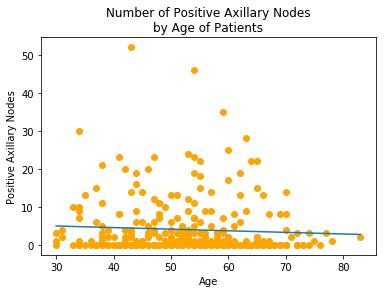

In [9]:
plt.scatter(df['Age'], df['Positive Axillary Nodes'], color='orange')
plt.plot(np.unique(df['Age']), np.poly1d(np.polyfit(df['Age'], df['Positive Axillary Nodes'], 1))(np.unique(df['Age'])))
plt.title('Number of Positive Axillary Nodes\nby Age of Patients')
plt.xlabel('Age')
plt.ylabel('Positive Axillary Nodes')
plt.show()

###Figure 2 -- Barplot of Number of Survivals by Age

In [10]:
# See spread of patients by age
df.describe()

,Age,Year of Operation,Positive Axillary Nodes,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


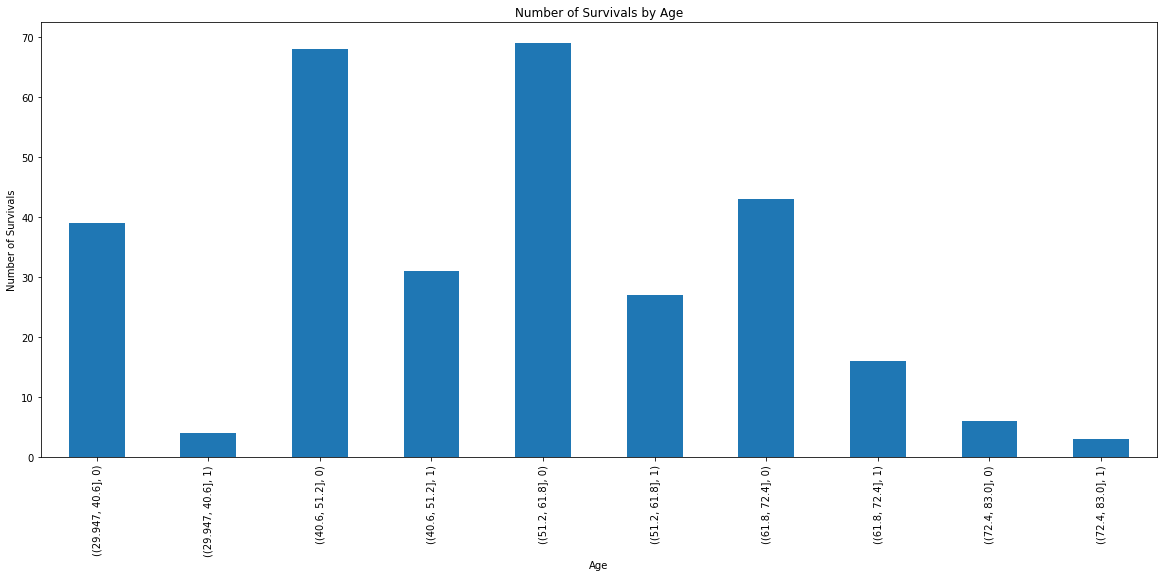

In [11]:
df.groupby(age_bins)['Survival Status'].value_counts().plot(kind='bar', figsize=(20,8))
plt.title('Number of Survivals by Age')
plt.xlabel('Age')
plt.ylabel('Number of Survivals')
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

    *   The number of positive axillary nodes appears to have a positive relationship with survival (see Crosstab 1)

- What is at least one feature that looks to have a negative relationship with survival?

    *   Age appears to have a negative relationship with survival (see Figure 2)

- How are those two features related with each other, and what might that mean?

    *   The number of positive axillary nodes appears to slightly decrease with age (see Figure 1), which might be a contributing factor to the negative relationship of age with survival.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.